In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [14]:
X , y = make_circles(n_samples = 100 , noise = 0.1 , random_state = 1)


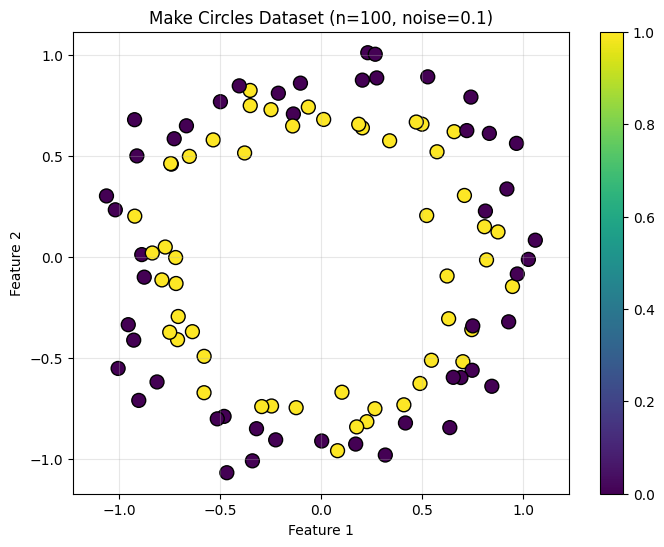

In [17]:
# Generate your data
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# 1. Visualize the data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=100)
plt.colorbar(scatter)
plt.title('Make Circles Dataset (n=100, noise=0.1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()




In [18]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 2)

In [20]:
model = Sequential()
model.add(Dense(256 , activation = 'relu', input_dim = 2))
model.add(Dense(1 , activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'])

In [23]:
history = model.fit(X_train , y_train , validation_data=(X_test , y_test) , epochs = 3500 , verbose =0)

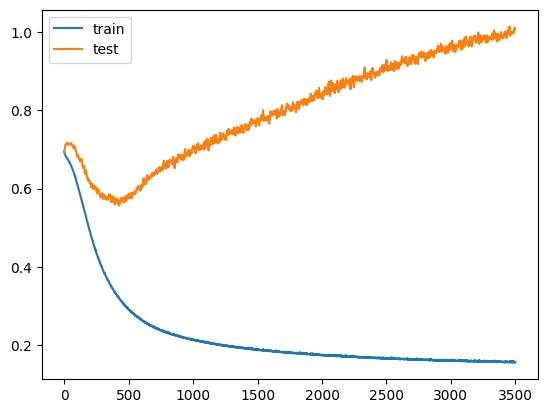

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'] , label='test')
plt.legend()
plt.show()

**Early stopping **

In [25]:
model = Sequential()

model.add(Dense(256 , activation = 'relu' , input_dim = 2))
model.add(Dense(1 , activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(loss="binary_crossentropy" , optimizer = "Adam", metrics = ['Accuracy'])

In [52]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',  # Monitor accuracy instead of loss
        min_delta=0.001,
        patience=50,
        mode='auto',  # Maximize accuracy
        restore_best_weights=True,
        verbose=1
    )
]

In [53]:
history = model.fit(X_train , y_train , validation_data = (X_test , y_test) , epochs = 3500 , callbacks =callback )

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - Accuracy: 0.6109 - loss: 0.6820 - val_Accuracy: 0.4000 - val_loss: 0.7011
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - Accuracy: 0.5250 - loss: 0.6871 - val_Accuracy: 0.4000 - val_loss: 0.7019
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - Accuracy: 0.5977 - loss: 0.6819 - val_Accuracy: 0.4000 - val_loss: 0.7032
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - Accuracy: 0.5883 - loss: 0.6836 - val_Accuracy: 0.4000 - val_loss: 0.7038
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - Accuracy: 0.5961 - loss: 0.6839 - val_Accuracy: 0.4000 - val_loss: 0.7042
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - Accuracy: 0.5648 - loss: 0.6836 - val_Accuracy: 0.4000 - val_loss: 0.7048
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - Accuracy: 0.5609 - loss: 0.6848 - val_Accuracy: 0.4000 - val_loss: 0.7059
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - Accuracy: 0.5703 - loss: 0.6801 - val_Accuracy: 0.4000 -

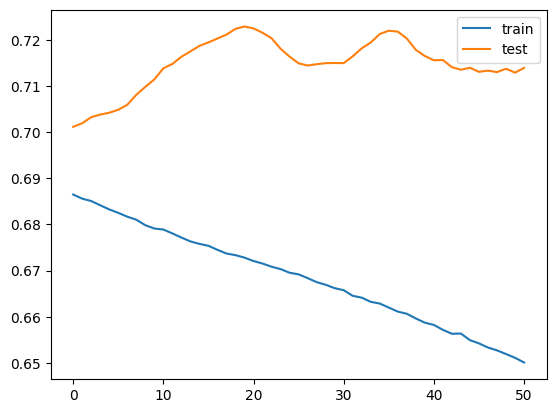

In [54]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'] , label='test')
plt.legend()
plt.show()

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step


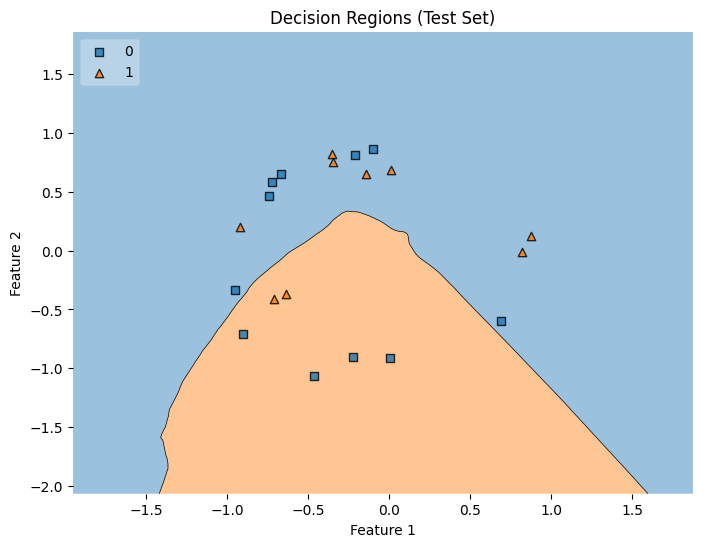

In [51]:
y_test_int = y_test.astype(np.int_)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test_int, clf=model, legend=2)
plt.title('Decision Regions (Test Set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()